# 机器学习建立流程：

* 软件包和数据加载
    * EDA
        * 数据检查
        * 处理缺失数据
        * 无关信息和冗余信息
        * 非数值数据处理
    * 数据可视化
    * 特征值工程
    * 机器学习模型

In [1]:
import pandas as pd
import numpy as np
import os
# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

In [2]:
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
sns.set(font='SimHei')

In [3]:
# 显示当前目录中的文件夹和文件;
import os
for dirname, _, filenames in os.walk('../dataset/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../dataset/600031.csv


In [4]:
# 加载数据
df_train = pd.read_csv('../dataset/600031.csv')
# 显示前5行数据
df_train.head()

日期     开盘     收盘     最高     最低      成交量         成交额    振幅   涨跌幅  \
0  2020-11-09  27.80  27.54  28.14  26.89   856249  2348800992  4.55  0.18   
1  2020-11-10  27.98  27.32  27.98  26.91   558824  1523209504  3.89 -0.80   
2  2020-11-11  27.33  28.31  28.86  27.21  1015374  2873205488  6.04  3.62   
3  2020-11-12  28.31  28.70  28.88  27.91   718595  2041558432  3.43  1.38   
4  2020-11-13  28.28  28.16  28.50  27.60   674807  1888773520  3.14 -1.88   

    涨跌额   换手率  
0  0.05  1.01  
1 -0.22  0.66  
2  0.99  1.20  
3  0.39  0.85  
4 -0.54  0.80

In [5]:
df_train.set_index('日期',inplace=True)

## * 1.EDA：

    * 数据检查

In [6]:
# 函数：检查DatFrame的丢失百分比;
def check_missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    percent = round(df.isnull().sum().sort_values(ascending = False) * 100 /len(df),2)
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])

In [7]:
check_missing_data(df_train)

Total  Percent
开盘       0      0.0
收盘       0      0.0
最高       0      0.0
最低       0      0.0
成交量      0      0.0
成交额      0      0.0
振幅       0      0.0
涨跌幅      0      0.0
涨跌额      0      0.0
换手率      0      0.0

    * 处理缺失数据

In [8]:
# 用0处理
if df_train.isnull().values.any():
    df_train.fillna(0.0, inplace = True)

    * 无关信息和冗余信息

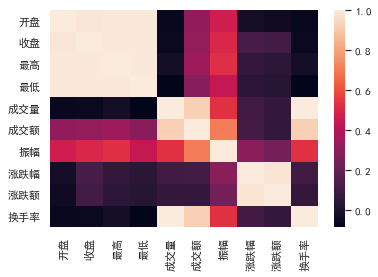

In [9]:
sns.heatmap(df_train.corr())
plt.show()

In [10]:
df_train.drop(['开盘','最高','最低','涨跌额','成交额'],axis=1,inplace=True)

In [11]:
df_train.head()

收盘      成交量    振幅   涨跌幅   换手率
日期                                          
2020-11-09  27.54   856249  4.55  0.18  1.01
2020-11-10  27.32   558824  3.89 -0.80  0.66
2020-11-11  28.31  1015374  6.04  3.62  1.20
2020-11-12  28.70   718595  3.43  1.38  0.85
2020-11-13  28.16   674807  3.14 -1.88  0.80

    * 非数值数据处理

无

## * 2.数据可视化：

<AxesSubplot:title={'center':"Histogram of '查看各列分布情况'"}, xlabel='换手率', ylabel='Density'>

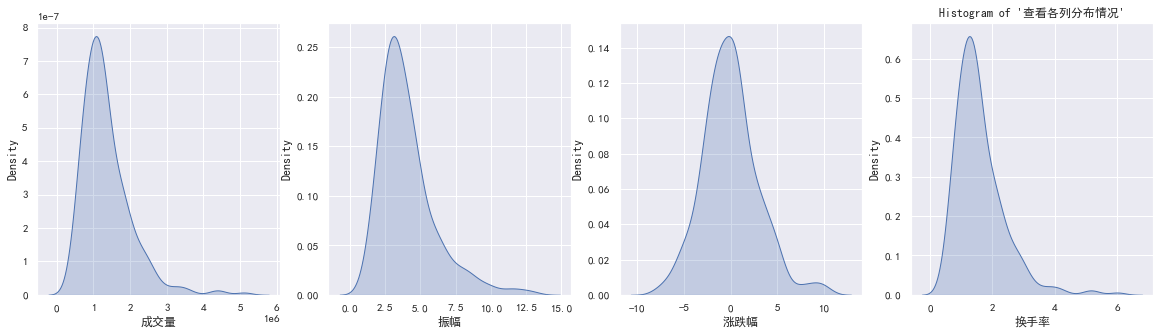

In [12]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(20,5))

plt.title("Histogram of '查看各列分布情况'")
sns.kdeplot(data=df_train['成交量'], shade=True, ax=ax1)

sns.kdeplot(data=df_train['振幅'], shade=True, ax=ax2)

sns.kdeplot(data=df_train['涨跌幅'], shade=True, ax=ax3)

sns.kdeplot(data=df_train['换手率'], shade=True, ax=ax4)

## * 3.特征值工程

In [13]:
datalist = list()
for i in range(0, len(df_train)):
    if df_train.iloc[i, list(df_train.columns).index('涨跌幅')] > 0:
        datalist.append(1)
    else:
        datalist.append(0)
df_train['涨跌'] = datalist

In [14]:
# 特征值处理
# 特征离散化
def fun(x):
    if 0<=abs(x)<2:
        return 1
    elif 2<=abs(x)<4:
        return 2
    elif 4<=abs(x)<6:
        return 3
    elif 6<=abs(x)<8:
        return 4
    else:
        return 5
    
df_train['振幅'] = df_train['振幅'].map(fun)  
df_train['换手率'] = df_train['换手率'].map(fun)  
df_train['涨跌幅'] = df_train['涨跌幅'].map(fun)  

In [15]:
# 移动平均处理
def mean_handle(total_list, cycle):
            return [np.mean(total_list[i:i + cycle]) for i in range(len(total_list))]

In [16]:
cycle = 15

In [17]:
for column in ['收盘','成交量']:
            df_train[column] = mean_handle(df_train[column].tolist(), cycle)

In [18]:
df_train.head()

收盘            成交量  振幅  涨跌幅  换手率  涨跌
日期                                                    
2020-11-09  28.743333  704892.533333   3    1    1   1
2020-11-10  28.954667  713645.333333   2    1    1   0
2020-11-11  29.282000  737789.066667   4    2    1   1
2020-11-12  29.554000  727904.266667   2    1    1   1
2020-11-13  29.751333  724724.733333   2    1    1   0

In [19]:
for colunm in ['收盘', '成交量']:
    datalist = list()
    datalist.append(0)
    for i in range(1, len(df_train[colunm])):
        datalist.append(df_train[colunm].tolist()[i] - df_train[colunm].tolist()[i - 1])
    df_train[colunm] = datalist

In [20]:
df_train.head()

收盘           成交量  振幅  涨跌幅  换手率  涨跌
日期                                                  
2020-11-09  0.000000      0.000000   3    1    1   1
2020-11-10  0.211333   8752.800000   2    1    1   0
2020-11-11  0.327333  24143.733333   4    2    1   1
2020-11-12  0.272000  -9884.800000   2    1    1   1
2020-11-13  0.197333  -3179.533333   2    1    1   0

In [21]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
# 归一化
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(df_train)

MinMaxScaler(feature_range=(-1, 1))

In [23]:
df_train = scaler.transform(df_train)

In [24]:
df_train = pd.DataFrame(df_train,columns=['收盘','成交量','振幅','涨跌幅','换手率','涨跌'])

In [25]:
df_train.head()

收盘       成交量   振幅  涨跌幅  换手率   涨跌
0 -0.186441 -0.046723  0.0 -1.0 -1.0  1.0
1  0.069411 -0.010257 -0.5 -1.0 -1.0 -1.0
2  0.209847  0.053864  0.5 -0.5 -1.0  1.0
3  0.142857 -0.087905 -0.5 -1.0 -1.0  1.0
4  0.052462 -0.059970 -0.5 -1.0 -1.0 -1.0

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
# 重新组织数据；保留具有有用功能的列;
input_cols = ['收盘','成交量','振幅','涨跌幅','换手率']
output_cols = ['涨跌']
X_train,X_test,y_train,y_test = train_test_split(df_train[input_cols],df_train[output_cols],train_size=0.85)

In [28]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((214, 5), (38, 5), (214, 1), (38, 1))

In [29]:
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [30]:
# Logistic regression;

model = LogisticRegression()
model.fit(X_train,y_train.values.ravel())
y_pred_lr=model.predict(X_test)
model.score(X_train,y_train)

0.6121495327102804

In [31]:
# KNN
model = KNeighborsClassifier(n_neighbors = 3) 
model.fit(X_train, y_train.values.ravel())  
y_pred_knn = model .predict(X_test)  
model.score(X_train,y_train)

0.7383177570093458

In [32]:
# Gaussian naive bayesian
from sklearn.naive_bayes import GaussianNB
model= GaussianNB()
model.fit(X_train,y_train.values.ravel())
y_pred_gnb=model.predict(X_test) 
model.score(X_train,y_train)

0.5747663551401869

In [33]:
# Linear SVM
model  = LinearSVC()
model.fit(X_train, y_train.values.ravel())

y_pred_svc = model.predict(X_test)
model.score(X_train,y_train)

0.6121495327102804

In [34]:
# Random forest
model  = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train.values.ravel())

y_pred_rf = model.predict(X_test)
model.score(X_train,y_train)

1.0

In [35]:
# Decision tree
model = DecisionTreeClassifier() 
model.fit(X_train, y_train.values.ravel())
y_pred_dt = model.predict(X_test) 
model.score(X_train,y_train)

1.0